# Regression Diagnostics in Statsmodels

## Introduction

So far, we have looked mainly at R-squared values along with some visualization techniques to confirm if the data and residuals fit the given set of assumptions. In this lesson, we shall look at some statistical procedures to further understand our model and results it produces. We shall be looking at the results we obtained in the regression analysis outcomes for Advertising dataset in the previous lab. 

*Note: Some of the terms in this lesson highlighting underlying statistical testing concepts may be new to some of us. We shall cover some of these in detail in later sections. Here, we shall focus more on running and interpreting the results of these tests in a regression context.*

## Objectives

You will be able to:
* Use Q-Q plots for check for the normality in residual errors
* Use the Jarque-Bera test for normal distribution of residuals
* Check for heteroscedasticity using Goldfeld-Quandt test to check whether variance is the same in 2 subsamples

## Let's get started

> Regression diagnostic is a set of procedures available for regression analysis that seek to assess the validity of a model in any of a number of different ways. This assessment may be an exploration of the model's underlying statistical assumptions, an examination of the structure of the model by considering formulations that have fewer, more or different explanatory variables, or a study of subgroups of observations, looking for those that are either poorly represented by the model (outliers) or that have a relatively large effect on the regression model's predictions.[Wiki](https://en.wikipedia.org/wiki/Regression_diagnostic)

Here we shall revisit some of the methods we have already seen, along with some new tests and how to interpret them . 

## Normality Check (Q-Q plots) 
We have already seen Q-Q plots as a measure to check for the normality (or any other distribution). These are also referred to as normal density plots when used with a standard normal quantiles. These plots are a good way to inspect the distribution of model errors. We saw this earlier with a toy dataset, let's plot a Q-Q for the residuals in `sales~TV` model. 

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


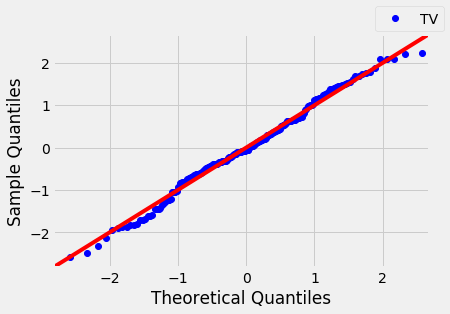

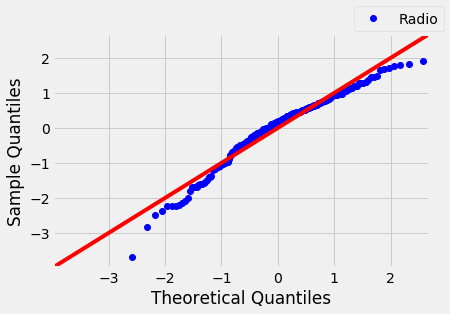

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('fivethirtyeight')

data = pd.read_csv('Advertising.csv', index_col=0)
f = 'sales~TV'
f2 = 'sales~radio'
model = smf.ols(formula=f, data=data).fit()
model2 = smf.ols(formula=f2, data=data).fit()

resid1 = model.resid
resid2 = model2.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True, label='TV')
fig.legend()
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True, label='Radio')
fig.legend()
fig.show()

Normal Q-Q Plots are a direct visual assessment of how well our residuals match what we would expect from a normal distribution. 

In terms of Q-Q plots above, we can see that residuals are better normally distributed in the case of TV than that of radio. We can also spot an outlier in the left tail of radio residuals, dealing with this might help inprove the fitness of the model. Outliers, skew, heavy and light-tailed aspects of distributions (all violations of normality) can be assessed from Q-Q plots. This migt need a bit of practice before you can truly start to intertrep them. Following image shows you how to relate a histogram to Q-Q plots. 
![](qq1.jpg)

To make it easier to read QQ-plots, it is nice to start with just considering histograms and/or scatter plots of the residuals as given by `statsmodels`.

## Normality Check (Jarque-Bera Test)

The Jarque-Bera (JB) test is a test for normality. This test is usually used for large data sets, because other tests like Q-Q plots are not reliable when n is large.

>Jarque-Bera test inspects the skewness and kurtosis of data to see if it matches a normal distribution. It is a common method for inspecting errors distribution in regression as shown below. 

> **JB = n [(√b1)2 / 6 + (b2 – 3)2 / 24]**

Here n is the sample size, √b1 is the sample skewness coefficient and b2 is the kurtosis coefficient.


Following explains how to run this test in statsmodels. A J-B value indicates that errors are not normally distributed. A result of 1 and above would means that the normality null hypothesis has been rejected at the 5% significance level. In other words, the data does not come from a normal distribution. A value of 0 indicates the data is normally distributed. We have already seen JB test using `model.summary()`. Following code shows how to run this test on its own. 

In [7]:
# JB test for TV
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
list(zip(name, test))


[('Jarque-Bera', 0.6688077048615619),
 ('Prob', 0.7157646605518615),
 ('Skew', -0.08863202396577206),
 ('Kurtosis', 2.779014973597054)]

We have the JB value = 0.66, which is obviously not ideal. The kurtosis is high as well as the Skew values show that underlying data is moderately skewed. Let's see what it gives us for the `radio` residuals. The p-value is also quite high to reject the null hypothesis for normality 

In [8]:
# JB test for radio
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test2 = sms.jarque_bera(model2.resid)
list(zip(name, test2))

[('Jarque-Bera', 21.90969546280269),
 ('Prob', 1.74731047370758e-05),
 ('Skew', -0.7636952540480038),
 ('Kurtosis', 3.5442808937621666)]

So this looks quite even worse in terms of JB results and skew, kurtosis in the data. 

This shows us that JB test could be a much better option for testing normality than Q-Q plots we saw earlier. 

## Checking Hetereoscadasticity (GOLDFELD-QUANDT test)

The Goldfeld Quandt (GQ) test is used in regression analysis to check for homoscedasticity in the error terms. GQ test is performed by checking if we can define a point that can be used to **differentiate** the variance of the error term. It is a parametric test and uses the assumption that the data is normally distributed. So its general practice to perform normality tests before GQ test. 

For keen students, here is an in-depth visual explanation on how this test is performed.

The test statistic for this test is the ratio of mean square residual errors for the regressions on the two subsets of data. Sample observations are divided into two groups, and evidence of heteroskedasticity is based on hypothesis testing on residual terms as shown below
. 

<img src="gq1.png" width=500>

Here is a brief description of involved steps:

* Order the data in ascending order. 
* Divide your data into three parts and drop values in the middle part.
* Run separate regression analysis on two parts. After each regression, find the Residual Sum of Squares.
* Calculate the ratio of the Residual sum of squares of two parts.
* Apply the F-test. 

(F-test will be covered later in the syllabus. [Here](https://en.wikipedia.org/wiki/F-test) is a quick introduction)

Large F values typically indicate that the variances are different.If the error term is homoscedastic, there should be no systematic difference between residuals. However, if the standard deviation of the distribution of the error term is proportional to the X variable, one part will generate a higher sum of square values than the other . 

Here is how you would run this test in statsmodels. 

In [9]:
# Run Goldfeld Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
list(zip(name, test))

[('F statistic', 1.2071212974713172), ('p-value', 0.17652851936962768)]

In [10]:
# Run Goldfeld Quandt test
import statsmodels.stats.api as sms
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model2.resid, model2.model.exog)
list(zip(name, test))

[('F statistic', 1.1409213847001902), ('p-value', 0.2576335266276581)]

The null hypothesis for the GQ test is homoskedasticity. The larger the F-statistic, the more evidence you’ll have against the homoskedasticity assumption and the more likely you have heteroskedasticity (different variance for the two groups). The given P-value above tells us how far we are from the alpha level of 0.05. So the heteroscedasticity which we observed visually can also be confirmed using this test. In such cases, it is also possible to use a different alpha values to suit the needs of experimenter. 

## Summary 
In this lesson we looked at a few methods o check for regression assumptions in addition to the visual methods we saw earlier. An understanding and hands-on experience with visual as well as statistical techniques to check your regression analysis will provide you with a good set of tools to run more detailed regression experiments later. 